# 라이브러리

In [1]:
from google.colab import drive
drive.mount("/content/drive")

import os
os.chdir("/content/drive/MyDrive/Online Lectures/Metacode_딥러닝라이브스터디8기/pj_신용카드이상탐지")

Mounted at /content/drive


In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV

# 데이터 로드
> 컬럼 설명
- Column ('V1', 'V2', 'V3', ... ,'V30) : 비식별화된 신용 카드 거래 Feature
- Class : 신용 카드 거래의 정상, 사기 여부 (정상 : 0, 사기 : 1)
- Time, Amount : 외 컬럼은 PCA 주성분분석 적용되었다고 함


In [3]:
df = pd.read_csv("creditcard_메타코드.csv")
display(df.shape, df.head(2))

(284807, 31)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


# 전처리

## TIME, 중복행

In [4]:
# TIme 컬럼 삭제
df.drop(['Time'], axis=1, inplace=True)

# 중복행 제거
num_duplicates = df.duplicated(keep='first').sum()
print(num_duplicates)

df = df.drop_duplicates(keep='first').reset_index(drop=True)
display(df.shape, df.head())

9144


(275663, 30)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Undersampling

In [5]:
# 클래스별 인덱스 선택
number_records_fraud = len(df[df.Class == 1])
fraud_indices = np.array(df[df.Class == 1].index)
normal_indices = df[df.Class == 0].index

# 정상 클래스 인덱스 중에서 일정 개수만큼 무작위 선택 => 언더샘플링을 위한 정상 샘플 결정
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# 사기 클래스와 무작위 선택된 정상 클래스의 인덱스 결합
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# 위에서 선택한 인덱스를 원본 데이터에서 추출
under_df = df.iloc[under_sample_indices, :]

X_undersample = under_df.loc[:, under_df.columns != 'Class']
y_undersample = under_df.loc[:, under_df.columns == 'Class']


print("Percentage of normal transactions: ", len(under_df[under_df.Class == 0])/len(under_df))
print("Percentage of fraud transactions: ", len(under_df[under_df.Class == 1])/len(under_df))
print("Total number of transactions in resampled df: ", len(under_df))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled df:  946


# Random Forest

In [6]:
under_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
534,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
616,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4802,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
5977,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6198,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268486,-1.683109,2.251862,-2.720962,-1.538805,0.791844,-0.631839,0.437841,1.127263,-0.489298,-0.053722,-0.614268,0.529625,-0.261125,1.636350,-0.795625,0.191197,-0.570832,0.599516,0.467673,0.033173,0.253594,0.656778,-0.179341,-0.317781,0.035549,0.122301,0.327639,0.241605,7.70,0
22146,-0.779633,0.027990,3.027259,-1.976663,-0.624364,-0.121508,0.085340,-0.648089,-0.116995,0.896308,-0.579167,-1.383578,0.201694,-1.551121,0.924394,1.635079,-0.706713,-0.527751,-0.163965,0.264732,0.372066,1.272319,-0.538934,0.068484,0.236316,-0.231941,-0.974133,-0.571717,8.99,0
237205,-0.598984,-0.719081,1.029937,-1.586099,0.765701,1.202200,-0.559032,0.635745,-0.626090,-0.145416,0.645480,0.649264,-0.007741,0.091165,0.249988,-2.066409,0.088448,0.646614,-1.652612,-0.498530,-0.239785,-0.240251,0.346489,-1.612958,-1.200193,-0.956422,0.312210,0.221164,29.90,0
145215,2.068716,0.252534,-1.553452,0.632857,0.460712,-0.854134,0.090960,-0.313996,1.792713,-0.747293,0.390437,-2.407056,1.590666,0.614594,-0.522277,0.283226,1.223942,-0.030895,-0.163042,-0.199859,-0.512038,-1.135685,0.353714,0.504272,-0.290571,0.131013,-0.090779,-0.036138,5.38,0


## 데이터분할

In [7]:
rs = 42

X = under_df.iloc[:, :-1]
y = under_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs) # stratify=y 없앰, 언더샘플링데이터셋 만들었으니까

display(
    X_train.shape, X_train.columns,
    X_test.shape,
    y_train.shape, y_test.shape
)

(756, 29)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

(190, 29)

(756,)

(190,)

## 스케일링

In [8]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 학습 및 예측

In [9]:
model = RandomForestClassifier(random_state=rs, class_weight={0:1, 1:10}, n_estimators=100)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 10}, random_state=42)

In [10]:
pred = model.predict(X_test_scaled)
pred

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1])

## 평가

### confusion_matrix

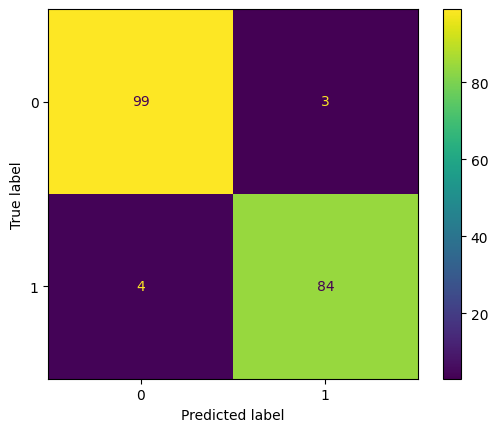

In [11]:
cm = confusion_matrix(y_test, pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cmd.plot()
plt.show()

In [12]:
accuracy = accuracy_score(y_test, pred)
print(f'정확도 : {accuracy}')

precision = precision_score(y_test, pred)
print(f'정밀도 : {precision}')

recall = recall_score(y_test, pred)
print(f'재현율 : {recall}')

f1 = f1_score(y_test, pred)
print(f'f1-score : {f1}')

정확도 : 0.9631578947368421
정밀도 : 0.9655172413793104
재현율 : 0.9545454545454546
f1-score : 0.96


In [13]:
accuracy = accuracy_score(y_test, pred)
print(f'정확도 : {accuracy:.2f}')

precision = precision_score(y_test, pred)
print(f'정밀도 : {precision:.2f}')

recall = recall_score(y_test, pred)
print(f'재현율 : {recall:.2f}')

f1 = f1_score(y_test, pred)
print(f'f1-score : {f1:.2f}')

정확도 : 0.96
정밀도 : 0.97
재현율 : 0.95
f1-score : 0.96


### ROC, AUC

In [14]:
y_score = model.predict_proba(X_test)[:, 1]
y_score

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0.98, 1.  , 0.95, 0.94, 1.  , 0.23, 0.07, 1.  , 1.  , 0.23, 0.18,
       1.  , 0.68, 0.67, 0.19, 1.  , 0.7 , 0.24, 0.52, 0.29, 0.19, 0.21,
       0.29, 0.27, 0.94, 1.  , 0.18, 0.54, 1.  , 0.99, 0.43, 0.38, 0.23,
       0.99, 0.97, 0.22, 1.  , 0.99, 0.38, 0.13, 0.13, 1.  , 0.24, 0.28,
       0.36, 0.26, 1.  , 0.09, 1.  , 0.33, 0.89, 0.2 , 1.  , 0.33, 0.96,
       1.  , 0.31, 0.21, 0.85, 0.35, 0.25, 0.2 , 1.  , 1.  , 0.32, 0.78,
       1.  , 0.97, 0.97, 0.91, 0.96, 0.89, 0.14, 0.4 , 0.99, 1.  , 0.99,
       0.72, 0.25, 0.95, 0.23, 0.12, 0.97, 0.62, 0.36, 0.35, 1.  , 0.91,
       1.  , 1.  , 1.  , 0.24, 0.99, 0.42, 0.26, 0.31, 0.23, 0.55, 0.31,
       0.6 , 0.35, 0.35, 0.22, 0.26, 0.26, 0.15, 0.24, 0.99, 1.  , 0.21,
       0.16, 0.99, 0.28, 0.91, 0.29, 0.34, 0.39, 1.  , 1.  , 0.31, 1.  ,
       0.21, 0.28, 0.3 , 0.21, 1.  , 1.  , 1.  , 0.5 , 0.22, 0.54, 1.  ,
       0.25, 0.45, 1.  , 1.  , 0.21, 0.37, 0.98, 0.18, 0.34, 1.  , 1.  ,
       0.14, 0.99, 0.98, 0.48, 0.33, 0.29, 0.36, 1.

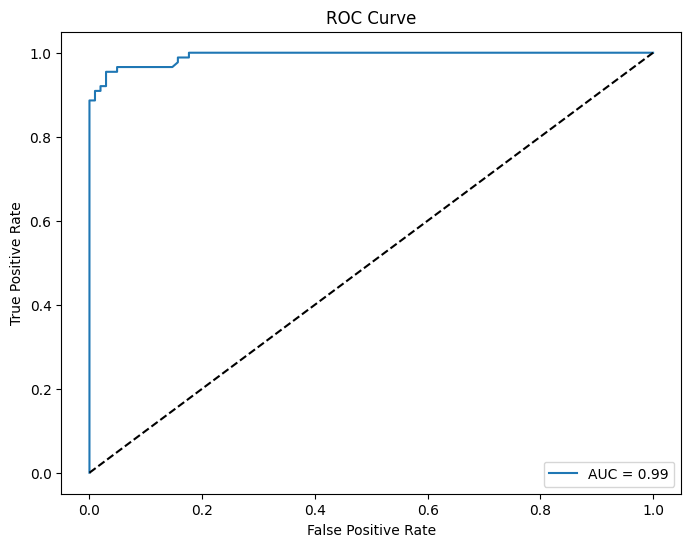

In [15]:
y_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## feature importances

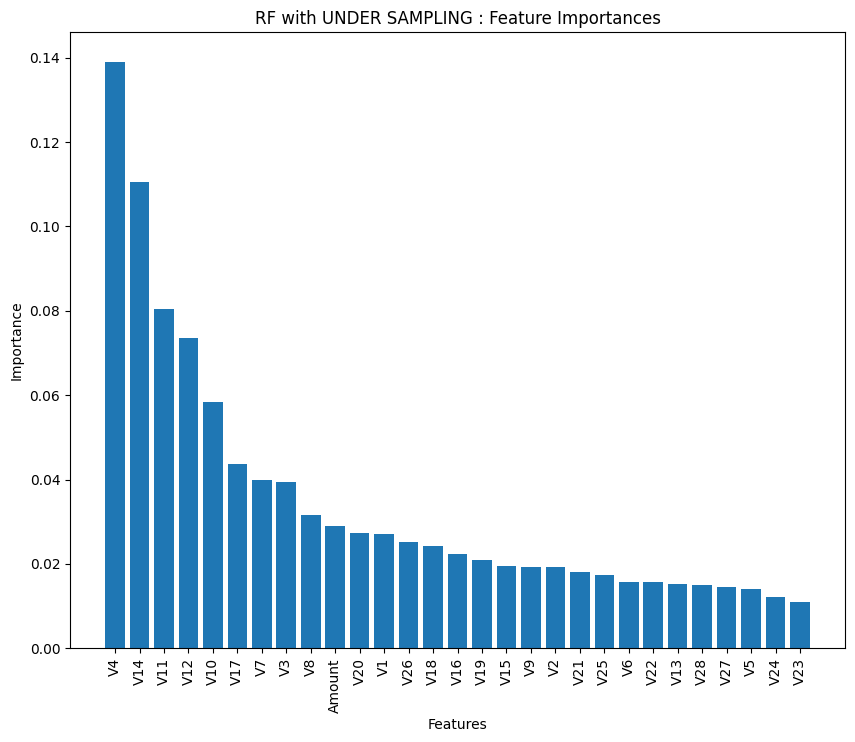

In [16]:
importances = model.feature_importances_
features = X.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title('RF with UNDER SAMPLING : Feature Importances')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

## Cross Validation => 오래걸려 안함

In [17]:
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# scores = cross_val_score(model, X, y, cv=kf)

# print("각 반복의 정확도:", scores)
# print("평균 정확도:", np.mean(scores))

# 튜닝 - GridSearchCV

In [18]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
    }

# 재현율을 사용하여 모델 평가를 위한 scorer 정의
recall_scorer = make_scorer(recall_score)

# GridSearchCV 객체 생성
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring=recall_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Grid search 수행
grid_search.fit(X_train_scaled, y_train)

# 결과 출력
print("Best parameters:", grid_search.best_params_)
print("Best recall score: {:.2f}".format(grid_search.best_score_))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best recall score: 0.89


In [19]:
# 파라미터 최적값 적용
best_params = {'bootstrap': False, 'max_depth': 10,
               'max_features': 'auto', 'min_samples_leaf': 1,
               'min_samples_split': 10, 'n_estimators': 300}
model = RandomForestClassifier(**best_params, random_state=42,
                               class_weight={0:1, 1:10})

model.fit(X_train_scaled, y_train)

pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, pred)
print(f'정확도 : {accuracy}')

precision = precision_score(y_test, pred)
print(f'정밀도 : {precision}')

recall = recall_score(y_test, pred)
print(f'재현율 : {recall}')

f1 = f1_score(y_test, pred)
print(f'f1-score : {f1}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


정확도 : 0.9473684210526315
정밀도 : 0.9239130434782609
재현율 : 0.9659090909090909
f1-score : 0.9444444444444444


In [20]:
### class_weight balanced로 하면 위에랑 똑같고, 없애면 떨어지긴 함  =>  결론: class_weight는 유의한 파라미터
best_params = {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
test_model = RandomForestClassifier(**best_params, random_state=rs)
test_model.fit(X_train_scaled, y_train)
test_pred = test_model.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, test_pred)
print(f'정확도 : {test_accuracy}')

test_precision = precision_score(y_test, test_pred)
print(f'정밀도 : {test_precision}')

test_recall = recall_score(y_test, test_pred)
print(f'재현율 : {test_recall}')

test_f1 = f1_score(y_test, test_pred)
print(f'f1-score : {test_f1}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


정확도 : 0.9578947368421052
정밀도 : 0.9545454545454546
재현율 : 0.9545454545454546
f1-score : 0.9545454545454546


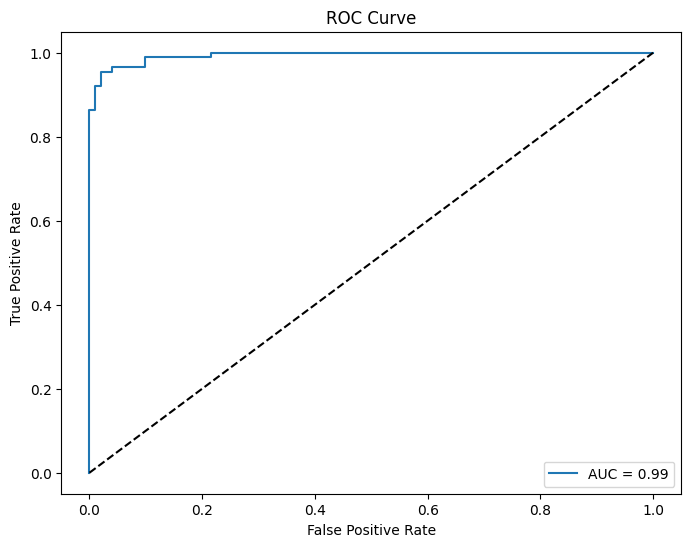

In [21]:
####################proba(X_test)아닌가 재검해라
y_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 튜닝 - 임계값 조정
- Youden's J Index

In [22]:
probabilities = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# 임계값 찾기
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("최적임계값: ", optimal_threshold)

# 새로운 임계값으로 예측
pred_new = (probabilities >= optimal_threshold).astype(int)

# 재현율 다시 계산
new_recall = recall_score(y_test, pred_new)
print("new Recall: ", new_recall)

최적임계값:  0.6222799895298209
new Recall:  0.9545454545454546


In [23]:
new_accuracy = accuracy_score(y_test, pred_new)
new_precision = precision_score(y_test, pred_new)
new_recall = recall_score(y_test, pred_new)
new_f1_score = f1_score(y_test, pred_new)

# 성능 지표 출력
print(f'New Accuracy: {new_accuracy:.2f}')
print(f'New Precision: {new_precision:.2f}')
print(f'New Recall: {new_recall:.2f}')
print(f'New F1 Score: {new_f1_score:.2f}')

New Accuracy: 0.97
New Precision: 0.98
New Recall: 0.95
New F1 Score: 0.97


Confusion Matrix:
[[100   2]
 [  4  84]]


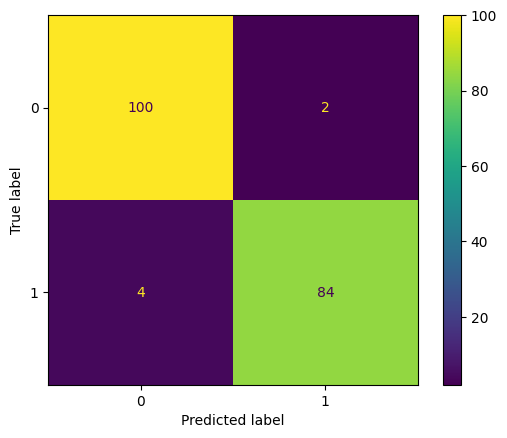

In [25]:
cm = confusion_matrix(y_test, pred_new)
print("Confusion Matrix:")
print(cm)

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cmd.plot()
plt.show()

In [26]:
# probabilities = model.predict_proba(X_test_scaled)[:, 1]
# auc_score = roc_auc_score(y_test, probabilities)
# print("AUC Score: {:.2f}".format(auc_score))

# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate (FPR)')
# plt.ylabel('True Positive Rate (TPR)')
# plt.title('Receiver Operating Characteristic (ROC)')
# plt.legend(loc="lower right")
# plt.show()

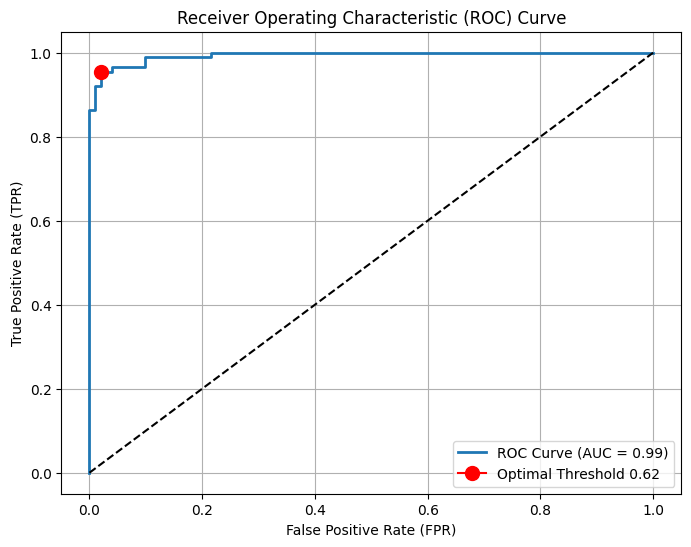

In [27]:
auc_score = roc_auc_score(y_test, probabilities)

# AUC값
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')

# 최적임계깞
optimal_point = [fpr[optimal_idx], tpr[optimal_idx]]
plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r', markersize=10, label=f'Optimal Threshold {optimal_threshold:.2f}')

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

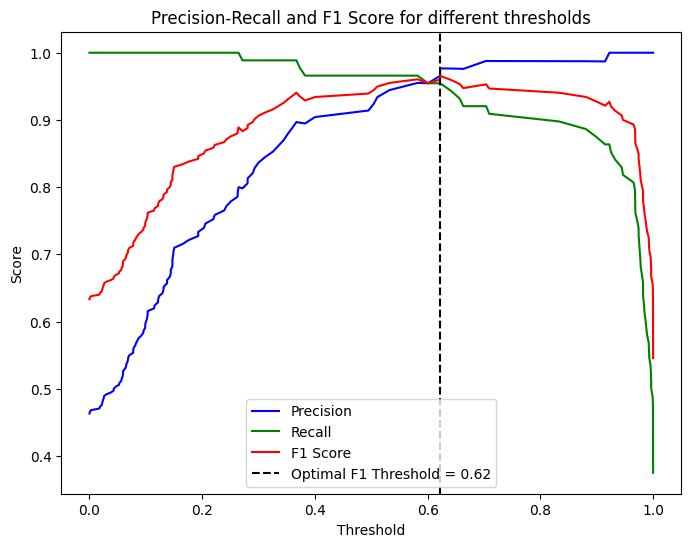

In [28]:
# Precision-Recall 계산
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)
# F1 Score 계산
f1_scores = 2 * (precision * recall) / (precision + recall)
# NaN 제거
f1_scores = np.nan_to_num(f1_scores)

# 최대 F1 Score의 임계값
optimal_f1_idx = np.argmax(f1_scores)
optimal_f1_threshold = thresholds[optimal_f1_idx]

# Precision-Recall Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], 'b-', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.plot(thresholds, f1_scores[:-1], 'r-', label='F1 Score')
plt.axvline(x=optimal_f1_threshold, color='k', linestyle='--', label=f'Optimal F1 Threshold = {optimal_f1_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall and F1 Score for different thresholds')
plt.legend(loc="best")
plt.show()

# Feature Importances

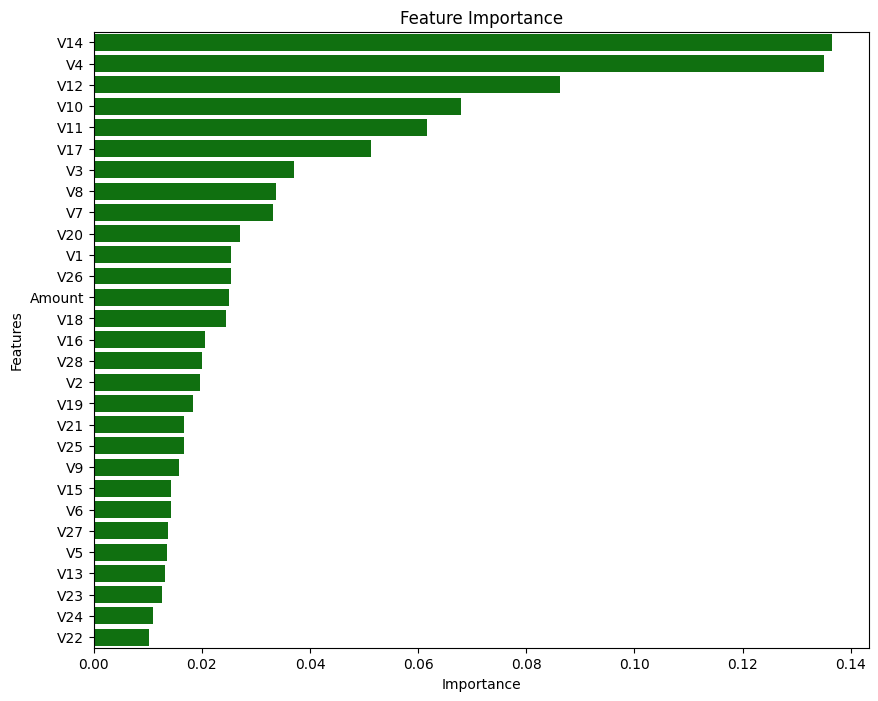

In [29]:
feature_importances = model.feature_importances_

features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

features = features.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=features, color='green')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()